In [3]:
# Import `shapely.geometry.Point` class
from shapely.geometry import Point

# Create `Point` objects:
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point4_3D = Point(9.26, -2.456, 0.57)

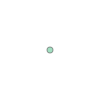

In [4]:
point1

In [5]:
print(point1)
print(point4_3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


In [6]:
type(point1)

shapely.geometry.point.Point

In [7]:
xy_tup = list(point1.coords)
x = point1.x
y = point1.y

print(f'{xy_tup}, {x}, {y}')

[(2.2, 4.2)], 2.2, 4.2


In [8]:
x = point4_3D.x
y = point4_3D.y
z = point4_3D.z

print(x, y, z)

9.26 -2.456 0.57


In [9]:
# Check input data
print(point1)
print(point2)

# Calculate the distance between point1 and point2
dist = point1.distance(point2)

# Print out a nicely formatted info message
print(f"Distance between the points is {dist:.2f} units")

POINT (2.2 4.2)
POINT (7.2 -25.1)
Distance between the points is 29.72 units


Shapely geometries are, by design, agnostic (unaware) of the reference system used to represent them. Distances and surface area calculated using the built-in shapely methods will always: a) assume a flat, Cartesian, Euclidean space, and b) return the calculated value in the unit of the coordinates (e.g., meters, or degrees).

In [10]:
# import the LineString class
from shapely.geometry import LineString

# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# Create a LineString from a list of coordinates:
# (with the same coordinate values as the points, so results should be identical)
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# Check if the lines are, indeed, identical:
line == line2

True

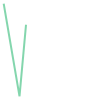

In [11]:
# Look at the line
line

In [12]:
# Get coordinate tuples
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

In [13]:
# Obtain x and y coordinates
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


Note that the xy property of shapely geometries does not return z values for three-dimensional geometries.

In [14]:
# Get the length of the line
line_length = line.length
print(f"Length of our line: {line_length:.1f} units")

# Get the centre point of the line
print(line.centroid)

Length of our line: 52.5 units
POINT (6.229961354035622 -11.892411157572392)


In [15]:
from shapely.geometry import Polygon

# Create a Polygon from the coordinates (at least 3 required)
polygon1 = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
polygon2 = Polygon([point1, point2, point3])

from shapely.geometry import LinearRing

# almost the same as polygon but the first and last point are the same
# which makes a closed shape
shell = LinearRing([point1, point2, point3, point1])
polygon3 = Polygon(shell)

polygon1 == polygon2 == polygon3

True

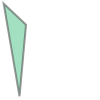

In [17]:
polygon1

In [18]:
# Create a polygon with a hole
# define the exterior
outer = LinearRing([(-180, 90), (-180, -90), (180, -90), (180, 90)])

# define a hole:
hole = LinearRing([(-170, 80), (-100, -80), (100, -80), (170, 80)])

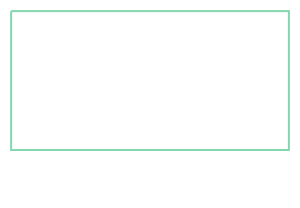

In [19]:
outer

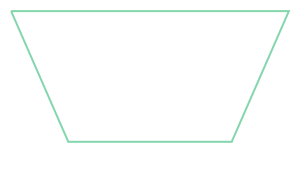

In [20]:
hole

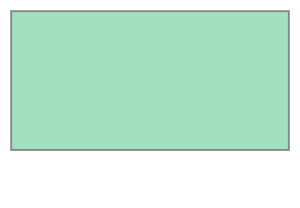

In [21]:
polygon_without_hole = Polygon(outer)
polygon_without_hole

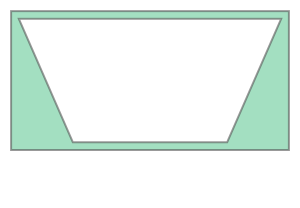

In [22]:
# The hole must be input wrapped in a list
polygon_with_hole = Polygon(outer, [hole])
polygon_with_hole

In [23]:
# Polygon properties
print(f"Polygon centroid: {polygon_with_hole.centroid}")
print(f"Polygon area: {polygon_with_hole.area}")
print(f"Polygon bounding box: {polygon_with_hole.bounds}")
print(f"Polygon exterior ring: {polygon_with_hole.exterior}")
print(f"Polygon circumference: {polygon_with_hole.exterior.length}")

Polygon centroid: POINT (0 -13.827160493827162)
Polygon area: 21600.0
Polygon bounding box: (-180.0, -90.0, 180.0, 90.0)
Polygon exterior ring: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon circumference: 1080.0


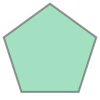

In [24]:
# Pentagon 
Polygon([(30, 2.01), (31.91, 0.62), (31.18, -1.63), (28.82, -1.63), (28.09, 0.62)])

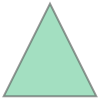

In [25]:
# Triangle
Polygon([(0,0), (2,4), (4,0)])

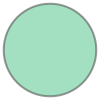

In [26]:
# Circle (using a buffer around a point)
point = Point((0,0))
point.buffer(1)

In shapely, collections of points are implemented as MultiPoint geometries, collections of lines as MultiLineString geometries, and collections of polygons as MultiPolygon geometries.

In [27]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

# Create a MultiPoint object of our points 1,2 and 3
multipoint = MultiPoint([point1, point2, point3])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multiline = MultiLineString([line1, line2])

print(multipoint)
print(multiline)

MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))


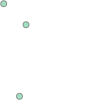

In [28]:
multipoint

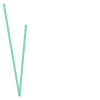

In [29]:
multiline